<a href="https://colab.research.google.com/github/DammuNikhitha/AI-ML-Internship-Task-14/blob/main/1_TASK14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 14: Model Comparison & Best Model Selection**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

## Step 1: Load Dataset and Preprocess

We use the Breast Cancer dataset from sklearn and apply StandardScaler.

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Step 2: Train Multiple Models Using Same Train-Test Split

In [3]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

train_scores = {}
test_scores = {}
results = []

In [4]:
for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    results.append([name, train_acc, test_acc, precision, recall, f1])

## Step 3: Create Model Comparison Table

In [5]:
columns = ["Model", "Train Accuracy", "Test Accuracy", "Precision", "Recall", "F1-score"]
df_results = pd.DataFrame(results, columns=columns)
df_results

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.986813,0.973684,0.972222,0.985915,0.979021
1,Decision Tree,1.000000,0.947368,0.957746,0.957746,0.957746
2,Random Forest,1.000000,0.964912,0.958904,0.985915,0.972222
3,SVM,0.986813,0.973684,0.972222,0.985915,0.979021


## Step 4: Plot Performance Comparison

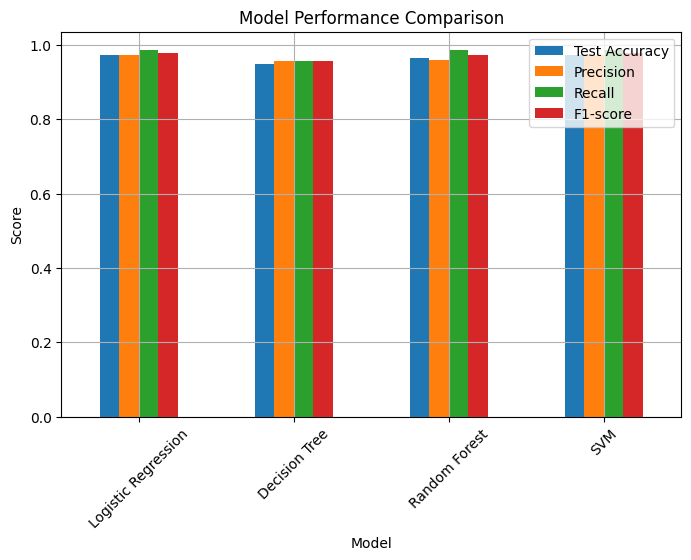

In [6]:
df_plot = df_results.set_index("Model")[["Test Accuracy", "Precision", "Recall", "F1-score"]]

df_plot.plot(kind="bar", figsize=(8,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Step 5: Identify Best Generalizing Model

In [7]:
best_model_row = df_results.sort_values(by="Test Accuracy", ascending=False).iloc[0]
best_model_row

,0
Model,Logistic Regression
Train Accuracy,0.986813
Test Accuracy,0.973684
Precision,0.972222
Recall,0.985915
F1-score,0.979021


## Step 6: Save the Best Model

In [8]:
best_model_name = best_model_row["Model"]
best_model = models[best_model_name]

joblib.dump(best_model, "best_model.pkl")

print("Best model saved as best_model.pkl")
print("Best Model:", best_model_name)

Best model saved as best_model.pkl
Best Model: Logistic Regression
